# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n, ThomasFermiZbar

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: Ltable-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
# mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

ModuleNotFoundError: No module named 'mendeleev'


# Load Data from George

In [23]:
class element():

    def __init__(self, file, Z, ni_cc, name=''):
        self.file = file
        self.name = name
        self.Z = Z
        self.ni_cc = ni_cc
        
        self.load_df()
        self.get_TF_Zbars()
        
    def load_df(self):
        self.df = read_csv(self.file, delim_whitespace = True, header=0)
        self.Zbars = self.df['Z_bar']
        self.TeVs  = self.df['Te(eV)']
    
    def get_TF_Zbars(self):
        # self.TF_TeVs  = np.geomspace(np.min(self.TeVs), np.max(self.TeVs), num=1000)
        self.TF_TeVs  = np.geomspace(1e-2,1e4, num=100)
        self.TF_Zbars = ThomasFermiZbar(self.Z, self.ni_cc, self.TF_TeVs)
        
Element_name = 'Aluminum'        
Al = element( "data/Al-rho=2,70-2023-09-03.dat",  13, 6.03e22,'Al')
H  = element( "data/H-rho=1-2023-09-06.dat"    ,  1, 5.98e23 ,'H')
C  = element( "data/C-rho=10-2023-09-05.dat"   ,  6, 5.01e23 , 'C')



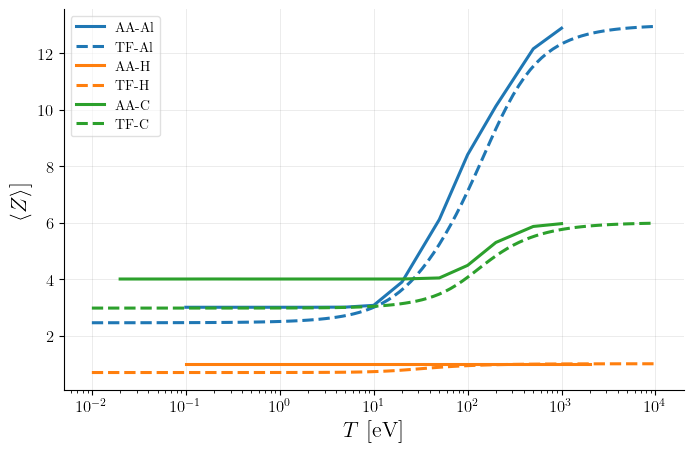

In [25]:
fig, ax = plt.subplots( facecolor='white')

Z_list = [13,1,6]

for Z, color, el in zip(Z_list, colors[:3],[Al, H, C]):
    ax.plot(el.TeVs, el.Zbars, color=color,label="AA-"+el.name)
    ax.plot(el.TF_TeVs, el.TF_Zbars, '--', color=color, label="TF-"+el.name)
    np.savetxt("data/TF-"+el.name+".dat", np.array([el.TF_TeVs, el.TF_Zbars]).T, header='T[eV]   Zbar', comments='')
ax.set_ylabel(r"$\langle Z \rangle$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
# ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()
